<a href="https://colab.research.google.com/github/careldelvine/Credit-Risk-Analysis/blob/main/Case_Study_Daily_Revenue_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Extracting data source

In [ ]:
# Reading sales groceries file
data = pd.read_csv('https://raw.githubusercontent.com/careldelvine/Credit-Risk-Analysis/main/Sales_Groceries.csv', encoding = 'latin')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Checking for missing values

In [ ]:
# Cheking missing values

missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

We have 24.9 % of the unknown customers and 0.2 % of missing descriptions. 

## Checking for Decription's and Customer Id's values

In [ ]:
data[data.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


In [ ]:
data.Description.isnull().sum()

1454

In [ ]:
data[data.Description.isnull()].CustomerID.isnull().value_counts()

True    1454
Name: CustomerID, dtype: int64

In [ ]:
data[data.Description.isnull()].UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

In cases of missing descriptions we always miss the customer and the unit price as well

In [ ]:
data[data.CustomerID.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
data.loc[data.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe()

,UnitPrice,Quantity
count,135080.000000,135080.000000
mean,8.076577,1.995573
std,151.900816,66.696153
min,-11062.060000,-9600.000000
25%,1.630000,1.000000
50%,3.290000,1.000000
75%,5.450000,3.000000
max,17836.460000,5568.000000


The price and the quantities of entries without a customer ID can show extreme outliers.

## Cheking for hidden missing values

In [ ]:
# Checking the 'nan' values

data.loc[data.Description.isnull()==False, "lowercase_descriptions"] = data.loc[
    data.Description.isnull()==False,"Description"
].apply(lambda l: l.lower())

data.lowercase_descriptions.dropna().apply(
    lambda l: np.where("nan" in l, True, False)
).value_counts()

False    539724
True        731
Name: lowercase_descriptions, dtype: int64

In [ ]:
# Cheking the empty values

data.lowercase_descriptions.dropna().apply(
    lambda l: np.where("" == l, True, False)).value_counts()

False    540455
Name: lowercase_descriptions, dtype: int64

We found hidden missing decriptions which are hidden nan-values that show a string "nan" instead of a nan-value and empty value.

In [ ]:
# Cleaning the 'nan' values and empty values

data.loc[data.lowercase_descriptions.isnull()==False, "lowercase_descriptions"] = data.loc[
data.lowercase_descriptions.isnull()==False, "lowercase_descriptions"
].apply(lambda l: np.where("nan" in l, None, l))

data = data.loc[(data.CustomerID.isnull()==False) & 
                (data.lowercase_descriptions.isnull()==False)].copy()

In [ ]:
# Checking another missing values

missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

InvoiceNo                 0.0
StockCode                 0.0
Description               0.0
Quantity                  0.0
InvoiceDate               0.0
UnitPrice                 0.0
CustomerID                0.0
Country                   0.0
lowercase_descriptions    0.0
dtype: float64

## Cheking for time period

In [ ]:
# Determaining the time period

data["InvoiceDate"] = pd.to_datetime(data.InvoiceDate, cache=True)
data.InvoiceDate.max() - data.InvoiceDate.min()

Timedelta('373 days 04:24:00')

In [ ]:
print("Sales Data starts with timepoint {}".format(data.InvoiceDate.min()))
print("Sales Data ends with timepoint {}".format(data.InvoiceDate.max()))

Sales Data starts with timepoint 2010-12-01 08:26:00
Sales Data ends with timepoint 2011-12-09 12:50:00


## Cheking for cancelled transactions

In [ ]:
# Determaining the unique values of invoice numbers

data.InvoiceNo.nunique()

22186

In [ ]:
# Determaining the cancelled transactions

data["IsCancelled"]=np.where(data.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
data.IsCancelled.value_counts() / data.shape[0] * 100

False    97.81007
True      2.18993
Name: IsCancelled, dtype: float64

The cancellations rate is 2.2% of all transactions 

In [ ]:
data.loc[data.IsCancelled==True].describe()

,Quantity,UnitPrice,CustomerID
count,8896.000000,8896.000000,8896.000000
mean,-30.882981,18.862815,14991.575202
std,1170.746458,444.590459,1707.208018
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13506.000000
50%,-2.000000,2.950000,14895.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [ ]:
# Cleaning the cancelled transactions

data = data.loc[data.IsCancelled==False].copy()
data = data.drop("IsCancelled", axis=1)

## Checking for stockcode values

In [ ]:
# Determaining the unique values of stockcode

data.StockCode.nunique()

3663

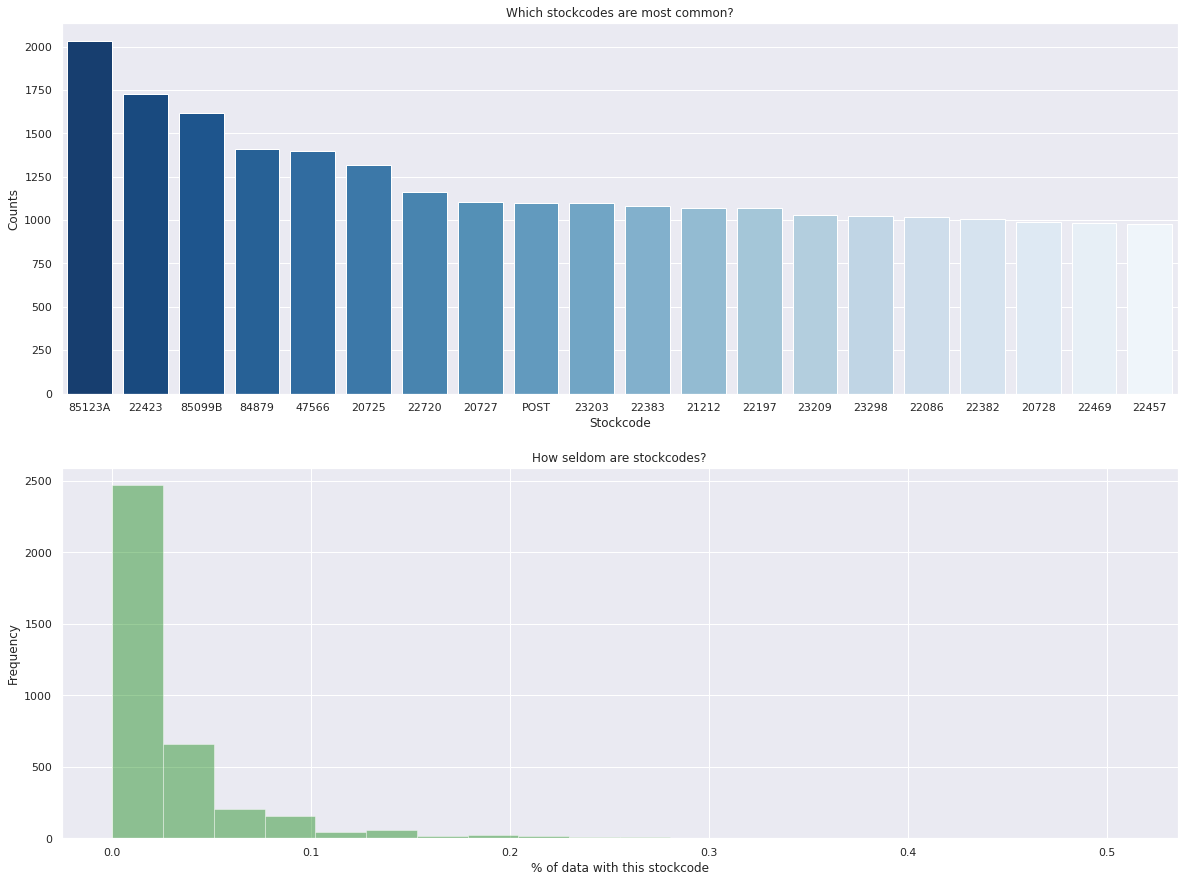

In [ ]:
stockcode_counts = data.StockCode.value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(2,1,figsize=(20,15))

g1=sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Blues_r")
g1.set_ylabel("Counts")
g1.set_xlabel("Stockcode")
g1.set_title("Which stockcodes are most common?");

g2=sns.distplot(np.round(stockcode_counts/data.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Blue")
g2.set_title("How seldom are stockcodes?")
g2.set_xlabel("% of data with this stockcode")
g2.set_ylabel("Frequency");

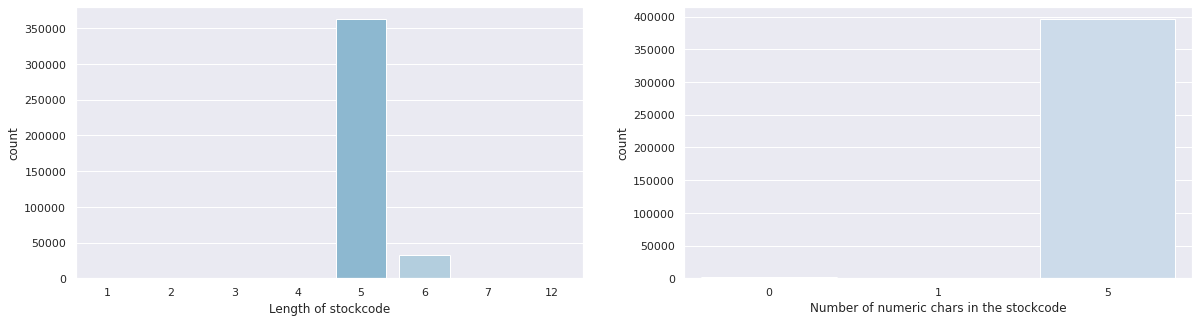

In [ ]:
# Count the number of numeric chars and the length of the stockcode

def count_numeric_chars(l):
    return sum(1 for c in l if c.isdigit())

data["StockCodeLength"] = data.StockCode.apply(lambda l: len(l))
data["nNumericStockCode"] = data.StockCode.apply(lambda l: count_numeric_chars(l))

fig, ax = plt.subplots(1,2,figsize=(20,5))

g1=sns.countplot(data["StockCodeLength"], palette="Blues_r", ax=ax[0])
g1.set_xlabel("Length of stockcode")

g2=sns.countplot(data["nNumericStockCode"], palette="Blues_r", ax=ax[1])
g2.set_xlabel("Number of numeric chars in the stockcode");

In [ ]:
data.loc[data.nNumericStockCode < 5].lowercase_descriptions.value_counts()

postage                       1099
manual                         290
carriage                       133
dotcom postage                  16
bank charges                    12
pads to match all cushions       4
Name: lowercase_descriptions, dtype: int64

In [ ]:
data = data.loc[(data.nNumericStockCode == 5) & (data.StockCodeLength==5)].copy()
data.StockCode.nunique()

2783

In [ ]:
data = data.drop(["nNumericStockCode", "StockCodeLength"], axis=1)

In [ ]:
# Determaining Unique Descriptions

data.Description.nunique()

2983

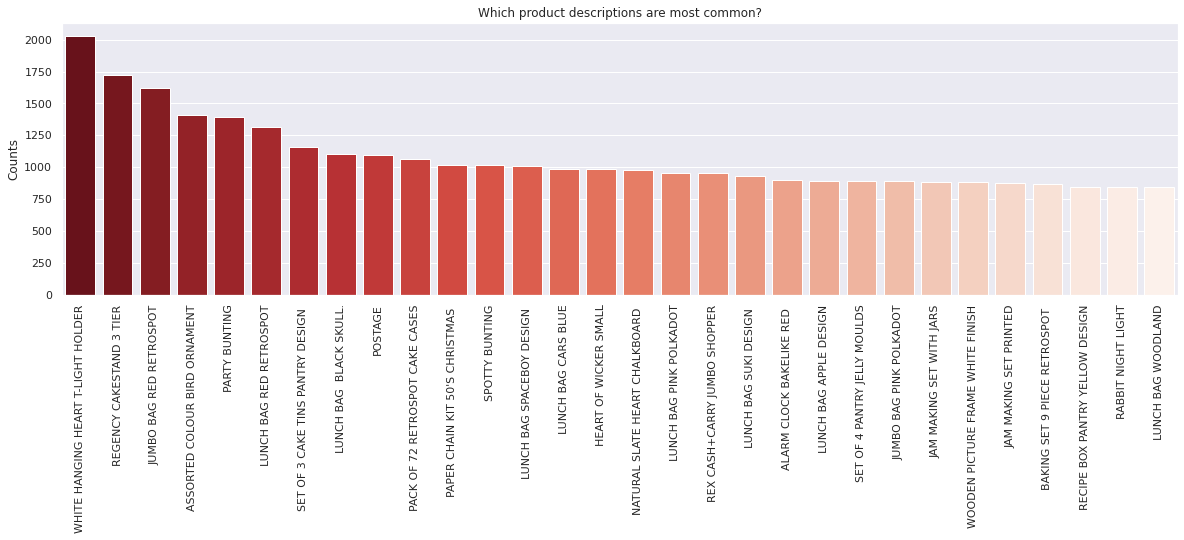

In [ ]:
description_counts = data.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Reds_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);

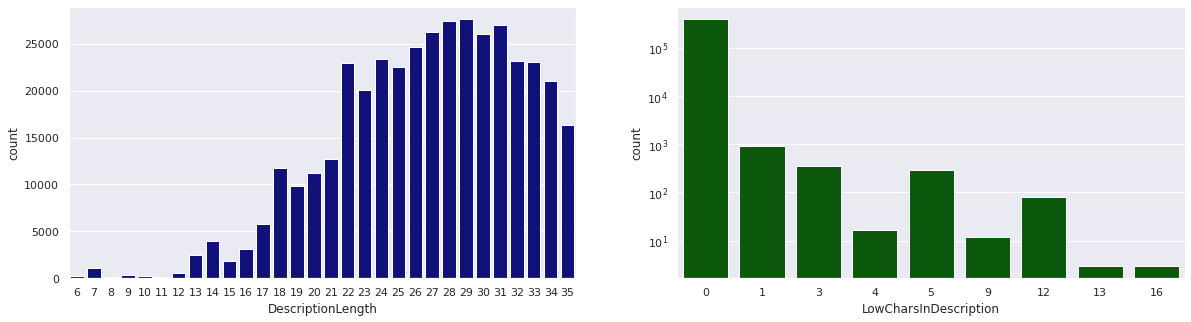

In [ ]:
def count_lower_chars(l):
    return sum(1 for c in l if c.islower())

data["DescriptionLength"] = data.Description.apply(lambda l: len(l))
data["LowCharsInDescription"] = data.Description.apply(lambda l: count_lower_chars(l))

fig, ax = plt.subplots(1,2,figsize=(20,5))
g1=sns.countplot(data.DescriptionLength, ax=ax[0], color="darkblue")

g2=sns.countplot(data.LowCharsInDescription, ax=ax[1], color="darkgreen")
g2.set_yscale("log")

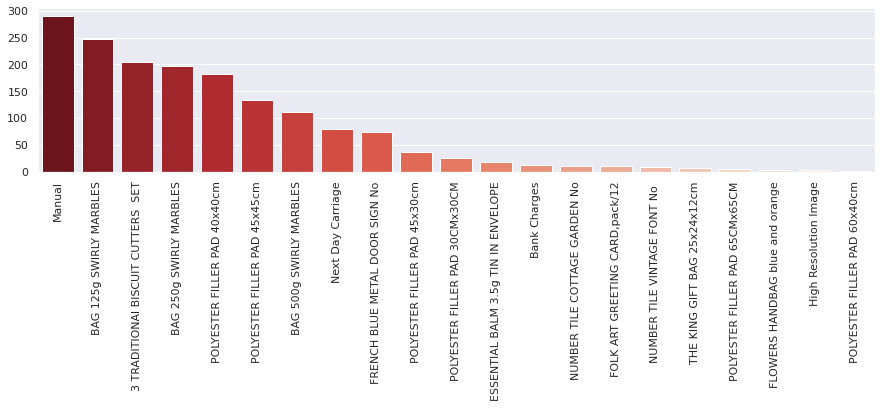

In [ ]:
lowchar_counts = data.loc[data.LowCharsInDescription > 0].Description.value_counts()

plt.figure(figsize=(15,3))
sns.barplot(lowchar_counts.index, lowchar_counts.values, palette="Reds_r")
plt.xticks(rotation=90);

In [ ]:
def count_upper_chars(l):
    return sum(1 for c in l if c.isupper())

data["UpCharsInDescription"] = data.Description.apply(lambda l: count_upper_chars(l))

In [ ]:
data.UpCharsInDescription.describe()

count    362522.000000
mean         22.572291
std           4.354845
min           3.000000
25%          20.000000
50%          23.000000
75%          26.000000
max          32.000000
Name: UpCharsInDescription, dtype: float64

In [ ]:
data.loc[data.UpCharsInDescription <=5].Description.value_counts()

Next Day Carriage        79
High Resolution Image     3
Name: Description, dtype: int64

In [ ]:
data = data.loc[data.UpCharsInDescription > 5].copy()

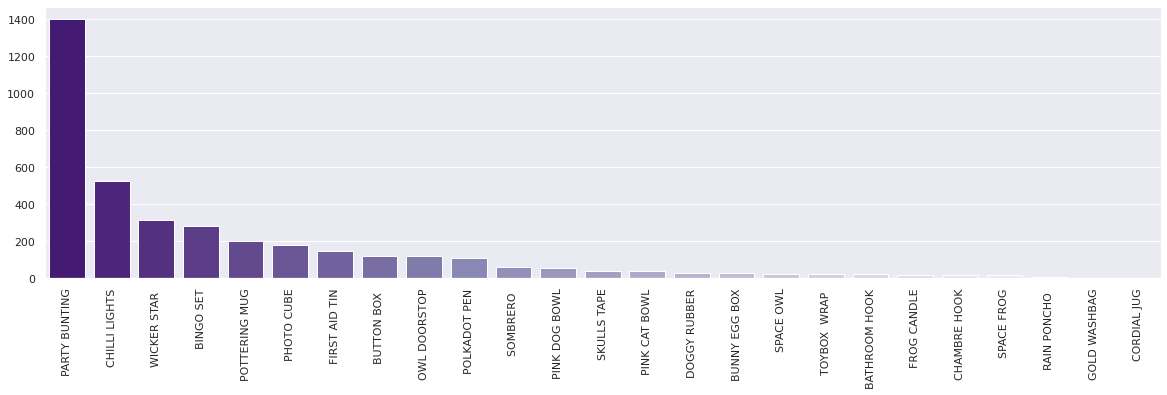

In [ ]:
dlength_counts = data.loc[data.DescriptionLength < 14].Description.value_counts()

plt.figure(figsize=(20,5))
sns.barplot(dlength_counts.index, dlength_counts.values, palette="Purples_r")
plt.xticks(rotation=90); 

In [ ]:
data.StockCode.nunique()

2781

In [ ]:
data.Description.nunique()

2981

We still have more descriptions than stockcodes.

In [ ]:
data.groupby("StockCode").Description.nunique().sort_values(ascending=False).iloc[0:10]

StockCode
23236    4
23196    4
23413    3
23244    3
23126    3
23203    3
23209    3
23366    3
23131    3
23535    3
Name: Description, dtype: int64

In [ ]:
data.loc[data.StockCode == "23196"].Description.value_counts()

VINTAGE LEAF MAGNETIC NOTEPAD         218
RETRO LEAVES MAGNETIC NOTEPAD          20
RETO LEAVES MAGNETIC SHOPPING LIST      3
LEAVES MAGNETIC  SHOPPING LIST          2
Name: Description, dtype: int64

### **Customer Analysis**

In [ ]:
data.CustomerID.nunique()

4315

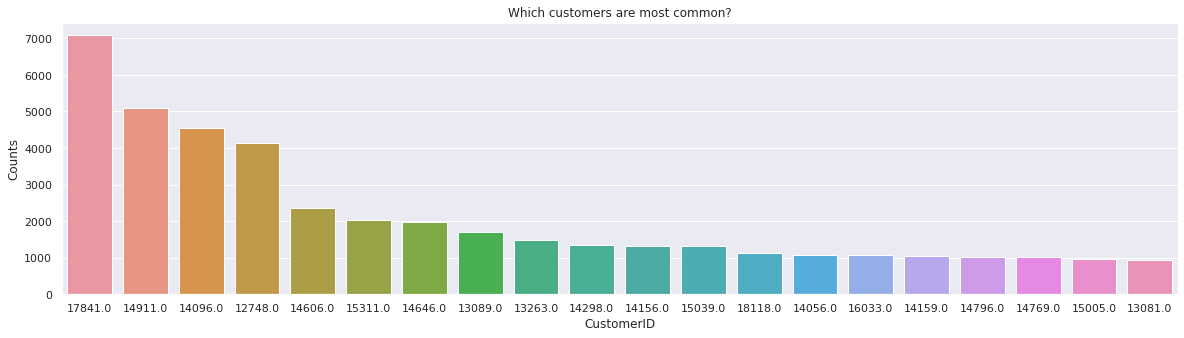

In [ ]:
customer_counts = data.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");
#plt.xticks(rotation=90);

### **Country Analysis**

In [ ]:
data.Country.nunique()

37

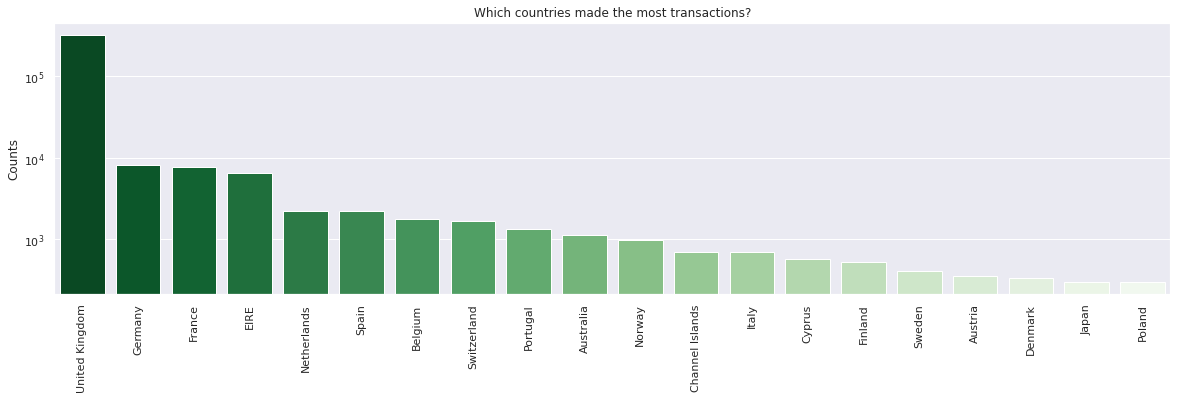

In [ ]:
country_counts = data.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

### **Unit Price Analysis**

In [ ]:
data.UnitPrice.describe()

count    362440.000000
mean          2.885355
std           4.361812
min           0.000000
25%           1.250000
50%           1.790000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
data.loc[data.UnitPrice == 0].sort_values(by="Quantity", ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowercase_descriptions,DescriptionLength,LowCharsInDescription,UpCharsInDescription
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,asstd design 3d paper stickers,30,0,25
298054,562973,23157,SET OF 6 NATIVITY MAGNETS,240,2011-08-11 11:42:00,0.0,14911.0,EIRE,set of 6 nativity magnets,26,0,20
436428,574138,23234,BISCUIT TIN VINTAGE CHRISTMAS,216,2011-11-03 11:26:00,0.0,12415.0,Australia,biscuit tin vintage christmas,29,0,26
314746,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.0,14646.0,Netherlands,set of 2 ceramic christmas reindeer,35,0,29
314748,564651,21786,POLKADOT RAIN HAT,144,2011-08-26 14:19:00,0.0,14646.0,Netherlands,polkadot rain hat,18,0,15


In [ ]:
# Cleaning the zero value of unit prices

data = data.loc[data.UnitPrice > 0].copy()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowercase_descriptions,DescriptionLength,LowCharsInDescription,UpCharsInDescription
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,19,0,17
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,set 7 babushka nesting boxes,28,0,23
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,glass star frosted t-light holder,33,0,28
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,hand warmer union jack,22,0,19
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,hand warmer red polka dot,25,0,21


###  **Quantity Analysis**

In [ ]:
data.Quantity.describe()

count    362408.000000
mean         13.098030
std         187.559629
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

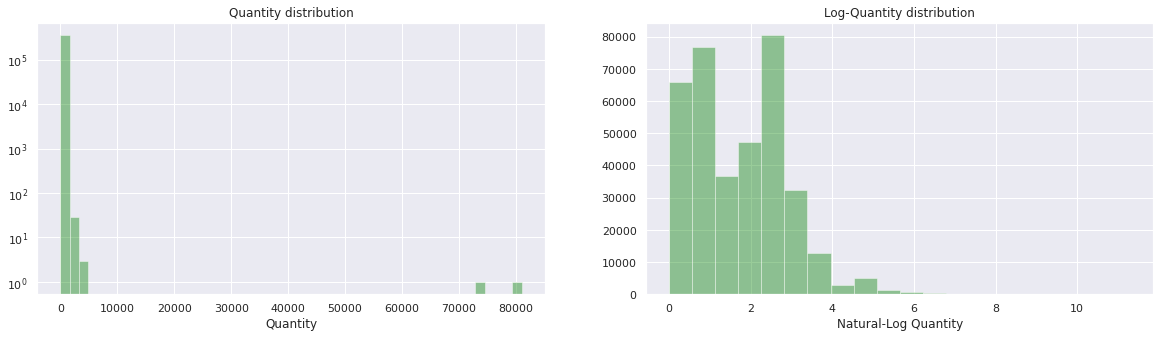

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(data.Quantity, ax=ax[0], kde=False, color="green");
sns.distplot(np.log(data.Quantity), ax=ax[1], bins=20, kde=False, color="green");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity");

In [ ]:
np.exp(4)

54.598150033144236

In [ ]:
data = data.loc[data.Quantity < 55].copy()

In [ ]:
data.Quantity.describe()

count    351973.000000
mean          8.334298
std           9.307179
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          54.000000
Name: Quantity, dtype: float64

## Predicting Daily Revenues

In [ ]:
data["Revenue"] = data.Quantity * data.UnitPrice
data["Year"] = data.InvoiceDate.dt.year
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.week
data["Weekday"] = data.InvoiceDate.dt.weekday
data["Day"] = data.InvoiceDate.dt.day
data["Dayofyear"] = data.InvoiceDate.dt.dayofyear
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [ ]:
grouped_features = ["Date", "Year", "Month", "Week", "Day","Weekday", "StockCode"]

In [ ]:
daily_data = pd.DataFrame(data.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Revenue"] = data.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head()

,Date,Year,Month,Week,Day,Weekday,StockCode,Quantity,Revenue
0,2010-12-01,2010,12,48,1,2,10002,60,51.00
1,2010-12-01,2010,12,48,1,2,10125,2,1.70
2,2010-12-01,2010,12,48,1,2,10133,5,4.25
3,2010-12-01,2010,12,48,1,2,16014,10,4.20
4,2010-12-01,2010,12,48,1,2,16016,10,8.50


In [ ]:
daily_data.loc[:, ["Quantity", "Revenue"]].describe()

,Quantity,Revenue
count,196366.000000,196366.000000
mean,14.938676,28.360271
std,18.801085,44.397686
min,1.000000,0.060000
25%,3.000000,6.950000
50%,9.000000,15.300000
75%,20.000000,31.200000
max,411.000000,1266.300000


In [ ]:
low_quantity = daily_data.Quantity.quantile(0.01)
high_quantity = daily_data.Quantity.quantile(0.99)
print((low_quantity, high_quantity))

(1.0, 88.0)


In [ ]:
low_revenue = daily_data.Revenue.quantile(0.01)
high_revenue = daily_data.Revenue.quantile(0.99)
print((low_revenue, high_revenue))

(0.78, 207.9)


In [ ]:
daily_data = daily_data.loc[(daily_data.Quantity >= low_quantity) & (daily_data.Quantity <= high_quantity)]
daily_data = daily_data.loc[(daily_data.Revenue >= low_revenue) & (daily_data.Revenue <= high_revenue)]

In [ ]:
daily_data.loc[:, ["Quantity", "Revenue"]].describe()

,Quantity,Revenue
count,191070.000000,191070.000000
mean,13.760151,25.120889
std,15.043583,29.465384
min,1.000000,0.780000
25%,3.000000,7.080000
50%,8.000000,15.300000
75%,20.000000,30.000000
max,88.000000,207.900000


### Revenue Analysis



In [ ]:
daily_revenue = daily_data.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
daily_revenue

,Year,Month,Revenue
0,2010,12,295024.42
1,2011,1,277977.39
2,2011,2,259546.58
3,2011,3,336614.35
4,2011,4,274376.50
5,2011,5,363120.06
6,2011,6,344207.50
7,2011,7,333126.50
8,2011,8,354639.33
9,2011,9,532045.30


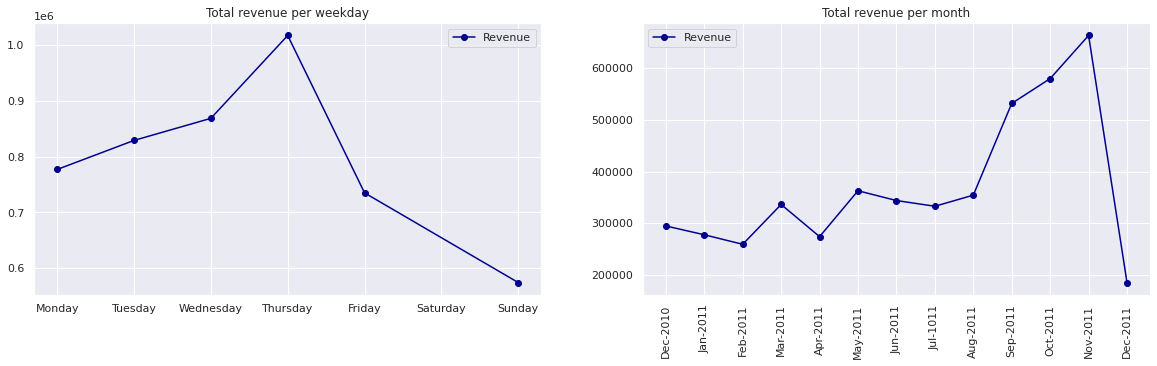

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]

daily_data.groupby("Weekday").Revenue.sum().plot(
    ax=ax[0], marker='o', label="Revenue", c="darkblue");
ax[0].legend();
ax[0].set_xticks(np.arange(0,7))
ax[0].set_xticklabels(weekdays);
ax[0].set_xlabel("")
ax[0].set_title("Total revenue per weekday");

ax[1].plot(daily_data.groupby(["Year", "Month"]).Revenue.sum().values,
    marker='o', label="Revenue", c="darkblue");
ax[1].set_xticklabels(yearmonth, rotation=90)
ax[1].set_xticks(np.arange(0, len(yearmonth)))
ax[1].legend();
ax[1].set_title("Total revenue per month");

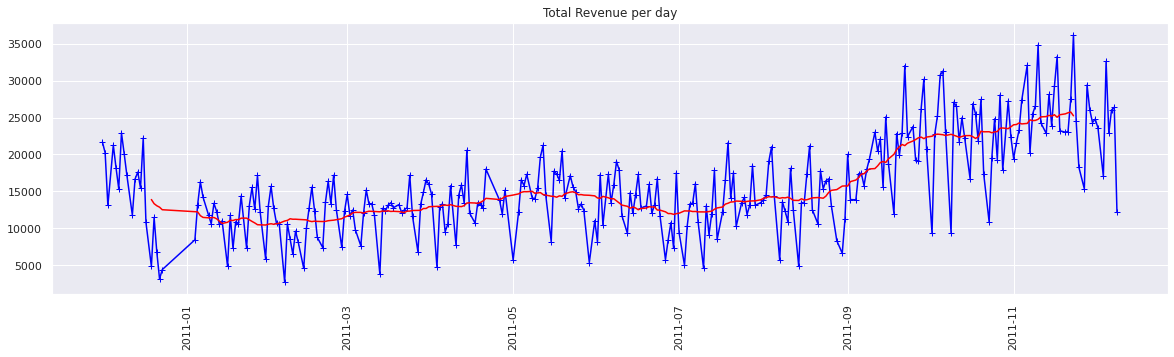

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(daily_data.groupby("Date").Revenue.sum(), marker='+', c="blue")
plt.plot(daily_data.groupby("Date").Revenue.sum().rolling(window=30, center=True).mean(),
        c="red")
plt.xticks(rotation=90);
plt.title("Total Revenue per day");

### Sales Analysis

In [ ]:
monthly_sales = daily_data.groupby(['Year','Month'])['Quantity'].sum().reset_index()
monthly_sales

,Year,Month,Quantity
0,2010,12,153195
1,2011,1,148885
2,2011,2,135401
3,2011,3,180401
4,2011,4,152577
5,2011,5,189672
6,2011,6,187840
7,2011,7,196757
8,2011,8,203826
9,2011,9,297972


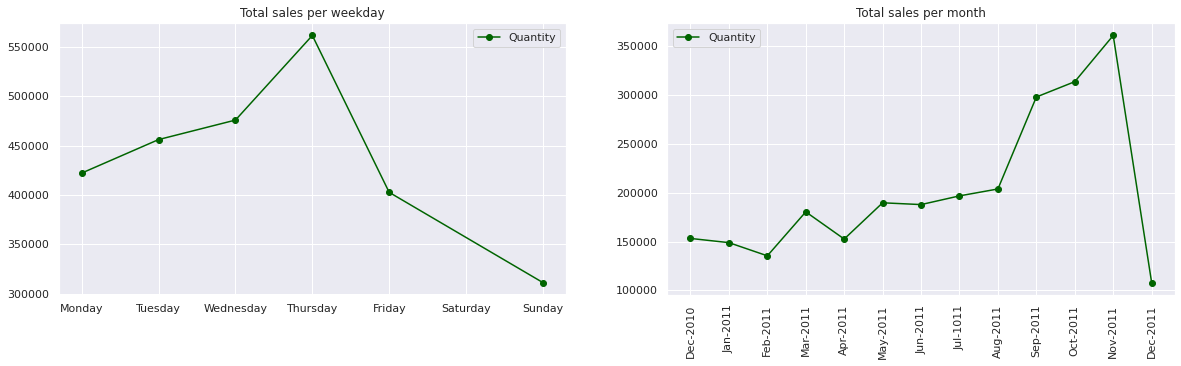

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]

daily_data.groupby("Weekday").Quantity.sum().plot(
    ax=ax[0], marker='o', label="Quantity", c="darkgreen");
ax[0].legend();
ax[0].set_xticks(np.arange(0,7)) 
ax[0].set_xticklabels(weekdays);
ax[0].set_xlabel("")
ax[0].set_title("Total sales per weekday");

ax[1].plot(daily_data.groupby(["Year", "Month"]).Quantity.sum().values,
    marker='o', label="Quantity", c="darkgreen");
ax[1].set_xticklabels(yearmonth, rotation=90)
ax[1].set_xticks(np.arange(0, len(yearmonth)))
ax[1].legend();
ax[1].set_title("Total sales per month");

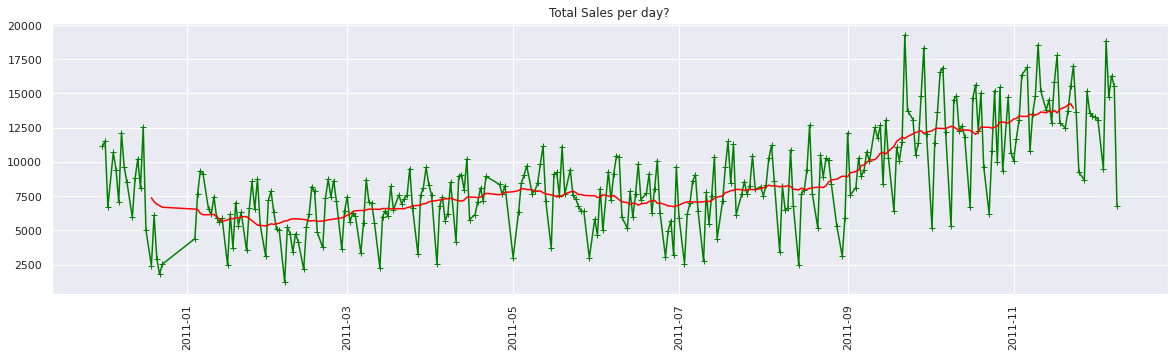

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(daily_data.groupby("Date").Quantity.sum(), marker='+', c="green")
plt.plot(daily_data.groupby("Date").Quantity.sum().rolling(window=30, center=True).mean(),c="red")
plt.xticks(rotation=90);
plt.title("Total Sales per day?");